# Blotto 6 Soldiers

In [1]:
from games.blotto import Blotto
import numpy as np
import matplotlib.pyplot as plt
from agents.random_agent import RandomAgent
from agents.fictitious_play import FictitiousPlay
from agents.regret_matching import RegretMatching
from utilities.utils import run_and_plot, plot_convergence_to_nash, plot_action_histogram, plot_action_trace_from_history


In [2]:
#initialize game
game = Blotto(6,3)
game.reset()

#print game information
agents = game.agents
moves = game._moves
num_action = game._num_actions
action_spaces = game.action_spaces
observation_spaces = game.observation_spaces 

ACTION_1_1_4 = 0
ACTION_1_2_3 = 1
ACTION_2_2_2 = 2
ACTION_LABELS = ["(1,1,4)", "(1,2,3)", "(2,2,2)"]

print("Game Information:")
print("Agents:", agents)
print("Moves:", moves)
print("Number of Actions:", num_action)
print("Action Spaces:", action_spaces)
print("Observation Spaces:", observation_spaces)

Game Information:
Agents: ['agent_0', 'agent_1']
Moves: [[1, 1, 4], [1, 2, 3], [2, 2, 2]]
Number of Actions: 3
Action Spaces: {'agent_0': Discrete(3), 'agent_1': Discrete(3)}
Observation Spaces: {'agent_0': typing.Dict[~AgentID, ~ActionType], 'agent_1': typing.Dict[~AgentID, ~ActionType]}


# Fictitious Play vs Fictitious Play

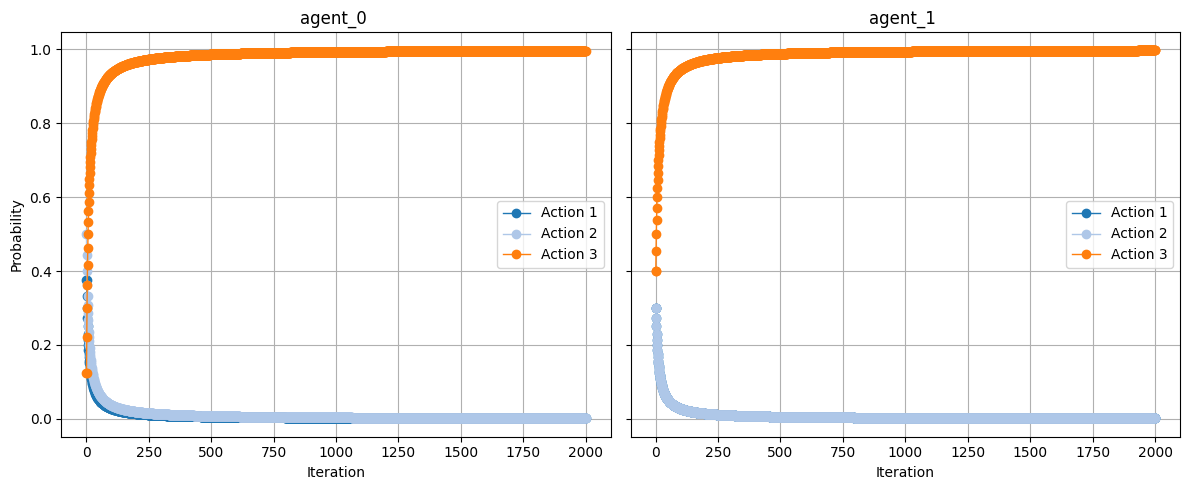

In [3]:
fp_agents = {agent: FictitiousPlay(game, agent, seed=42) for agent in agents}
policies, action_history = run_and_plot(fp_agents, game, num_iterations=2000, title_suffix="")

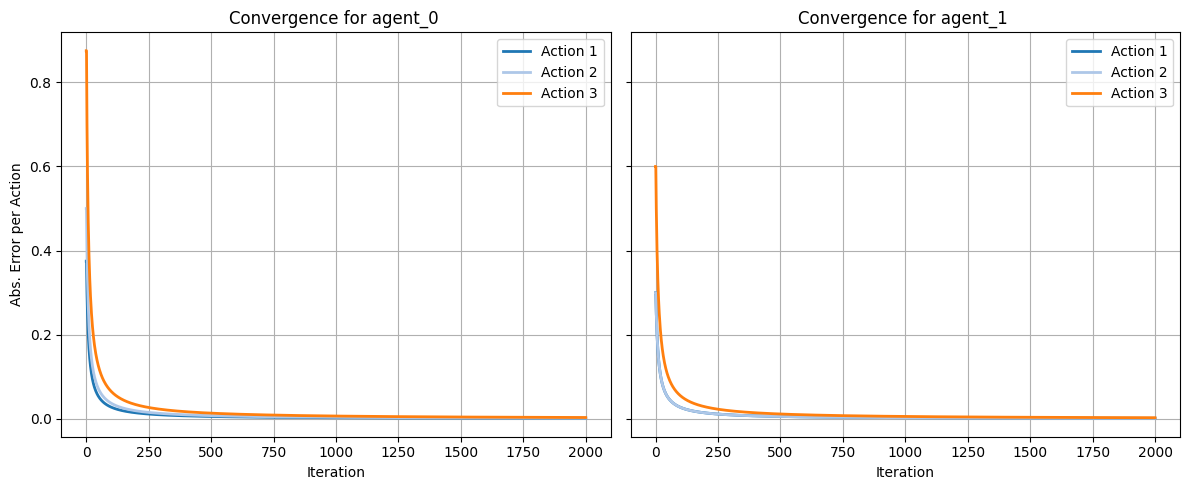

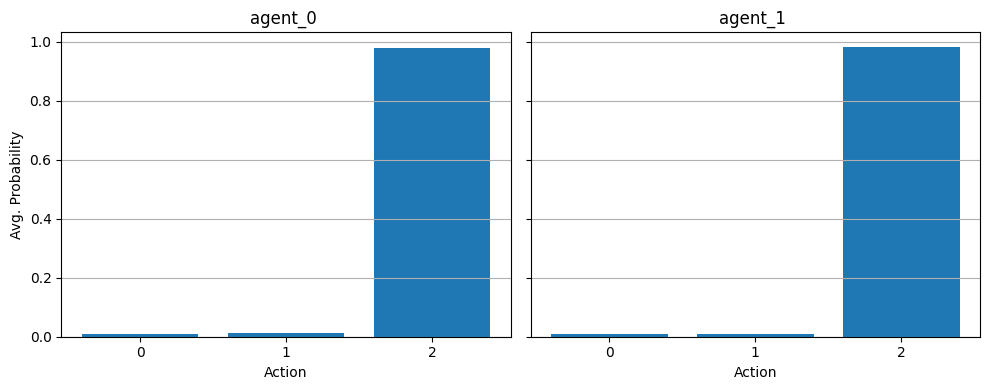

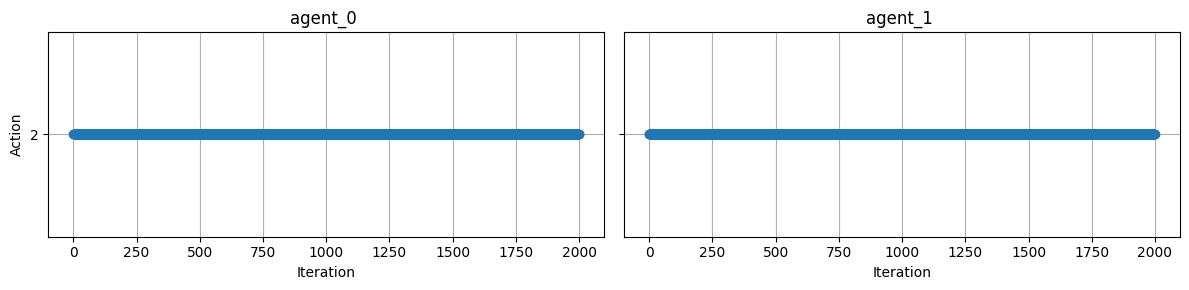

In [4]:

nash_equilibrium = {
    "agent_0": [0, 0, 1],  # (2,2,2) es el índice 2
    "agent_1": [0, 0, 1]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)



In [5]:
for agent in fp_agents:
    print(agent, fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in fp_agents:
    action = get_action_from_policy(fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.00149477 0.00199302 0.99651221]
agent_1 [0.00149328 0.00149328 0.99701344]
Action with high probability for agent_0: [2, 2, 2]
Action with high probability for agent_1: [2, 2, 2]


# Regret Matching vs Regret Matching

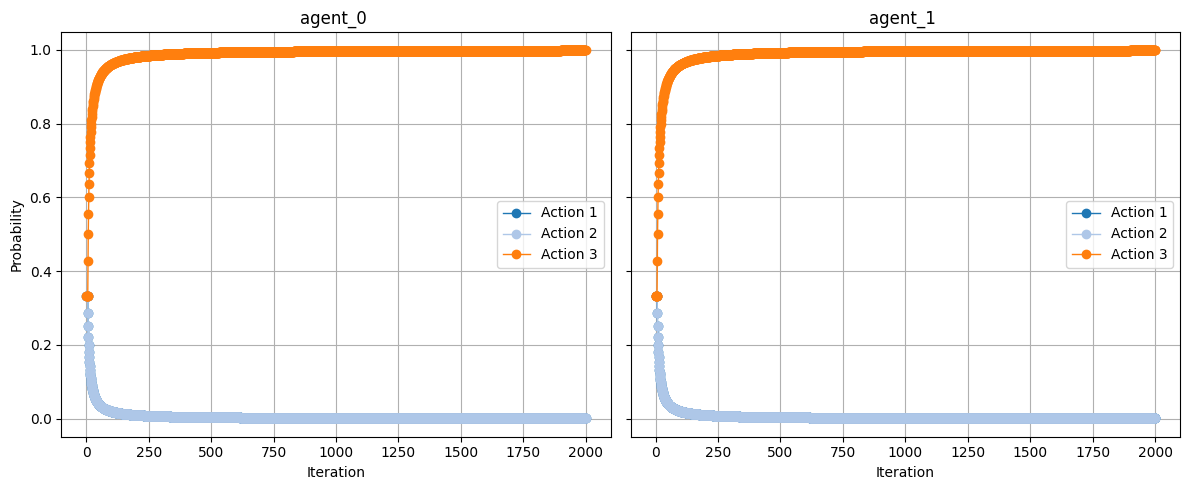

In [6]:
rm_agents = {agent: RegretMatching(game, agent, seed=1) for agent in agents}
policies, action_history = run_and_plot(rm_agents, game, num_iterations=2000, title_suffix="")

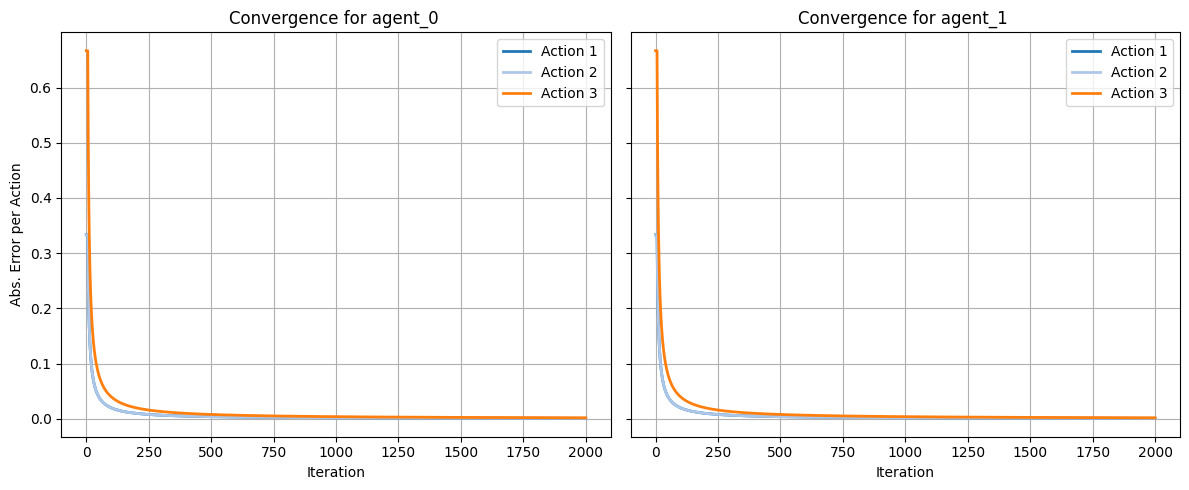

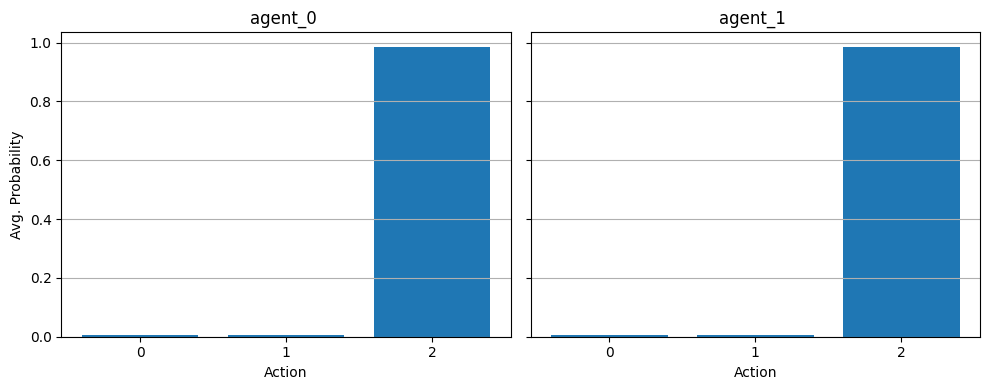

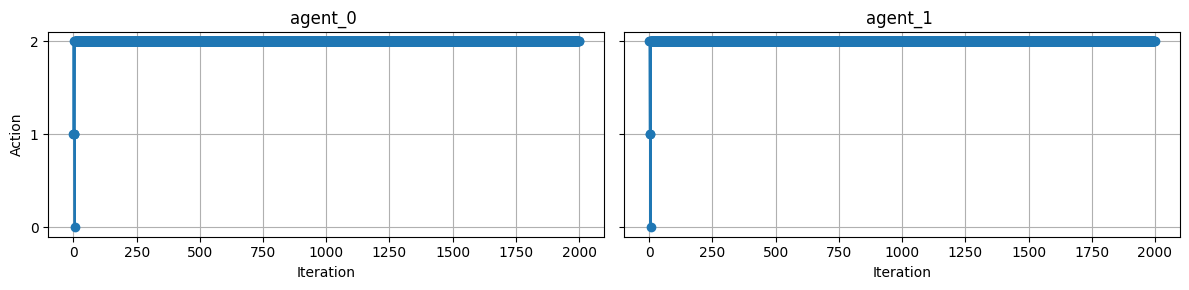

In [7]:
nash_equilibrium = {
    "agent_0": [0, 0, 1],  # (2,2,2) es el índice 2
    "agent_1": [0, 0, 1]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [8]:
for agent in rm_agents:
    print(agent, rm_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_agents:
    action = get_action_from_policy(rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.001 0.001 0.998]
agent_1 [0.001 0.001 0.998]
Action with high probability for agent_0: [2, 2, 2]
Action with high probability for agent_1: [2, 2, 2]


# Fictitious Play vs Regret Matching

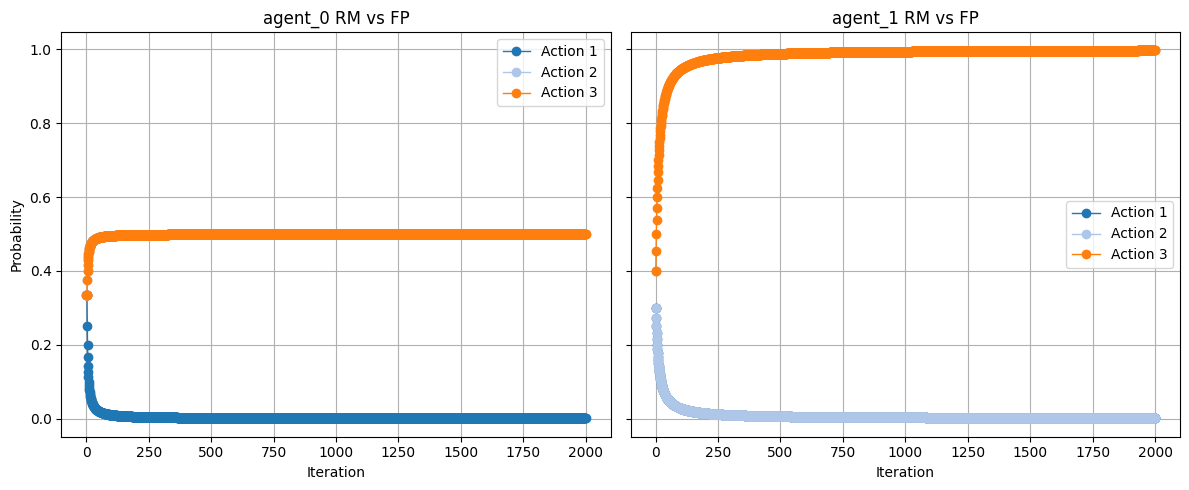

In [9]:
rm_vs_fp_agents = {agents[0]: RegretMatching(game=game, agent=agents[0], seed=7),
              agents[1]: FictitiousPlay(game=game, agent=agents[1], seed=42)}
policies, action_history = run_and_plot(rm_vs_fp_agents, game, num_iterations=2000, title_suffix="RM vs FP")

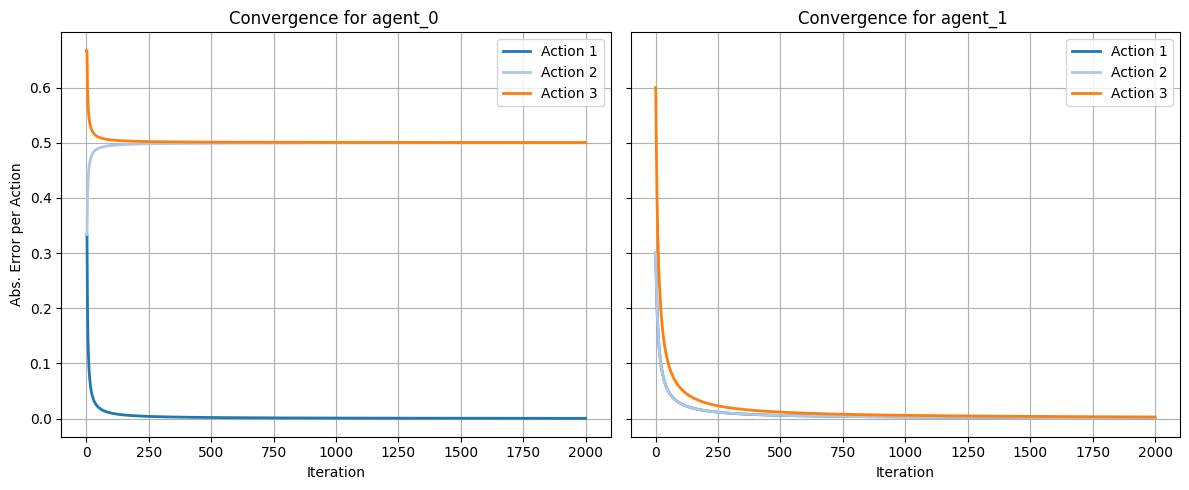

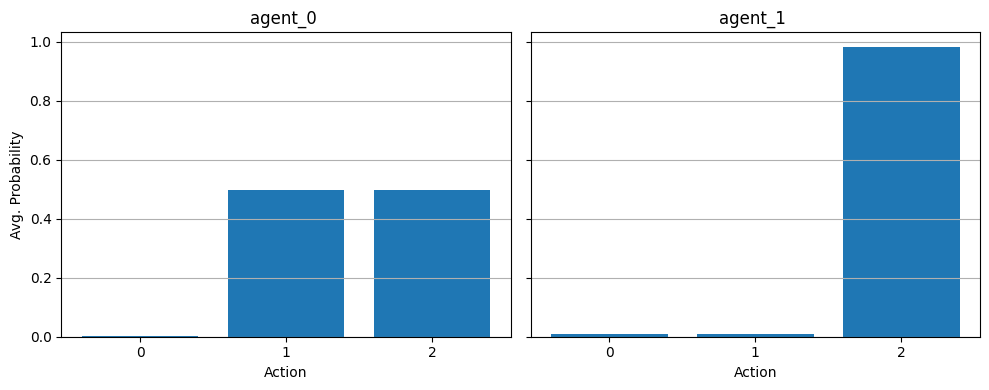

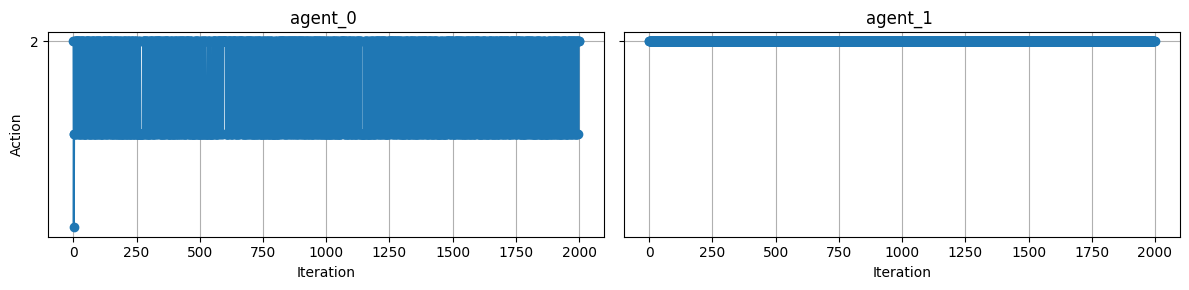

In [10]:
nash_equilibrium = {
    "agent_0": [0, 0, 1],  # (2,2,2) es el índice 2
    "agent_1": [0, 0, 1]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [11]:
for agent in rm_vs_fp_agents:
    print(agent, rm_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_vs_fp_agents:
    action = get_action_from_policy(rm_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.0005  0.49975 0.49975]
agent_1 [0.00149328 0.00149328 0.99701344]
Action with high probability for agent_0: [1, 2, 3]
Action with high probability for agent_1: [2, 2, 2]


# Random Agent vs Random Agent

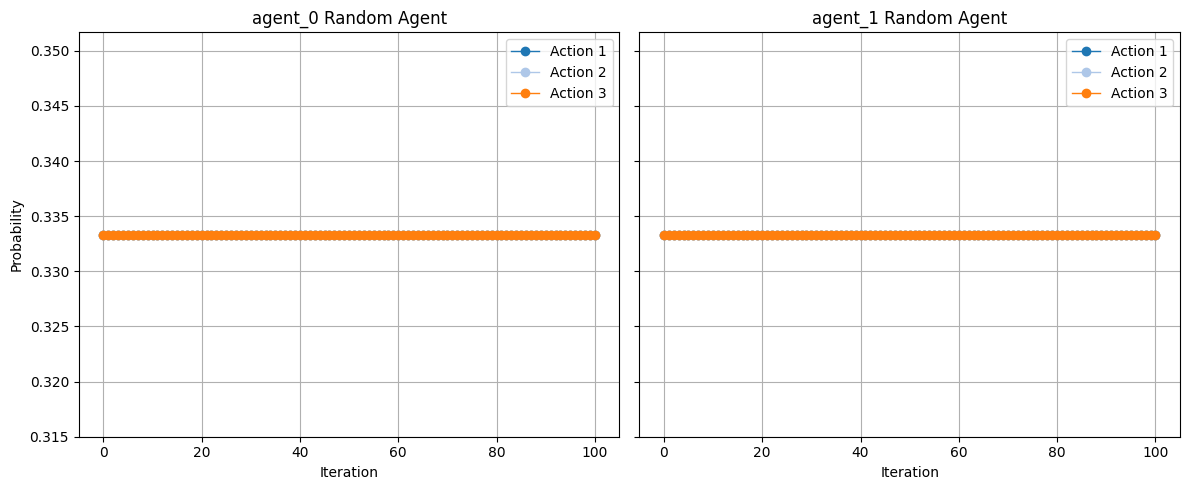

In [12]:
random_agents = {agent: RandomAgent(game, agent) for agent in agents}
policies, action_history = run_and_plot(random_agents, game, num_iterations=100, title_suffix="Random Agent")

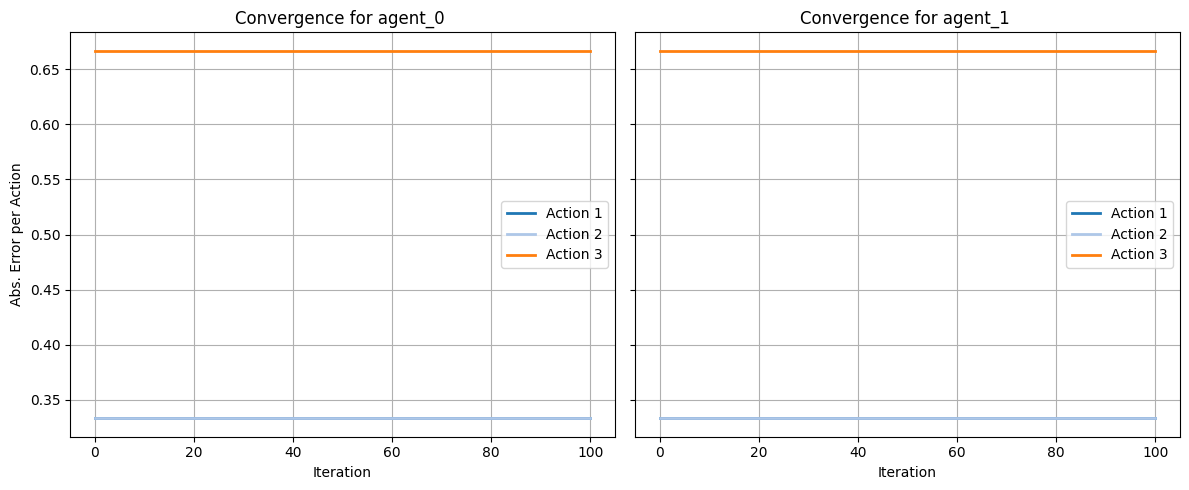

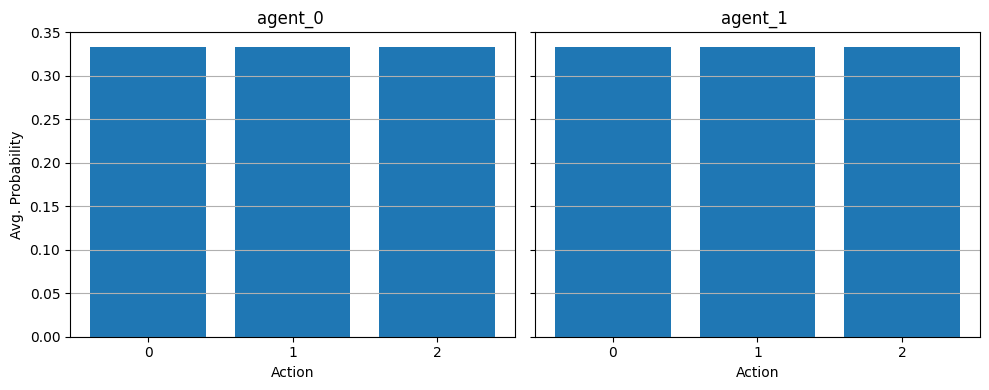

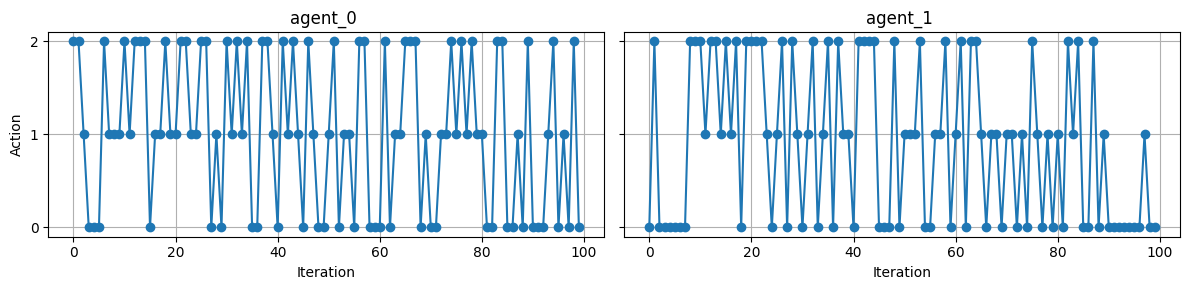

In [13]:
nash_equilibrium = {
    "agent_0": [0, 0, 1],  # (2,2,2) es el índice 2
    "agent_1": [0, 0, 1]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

# Random Agent vs Fictitious Play

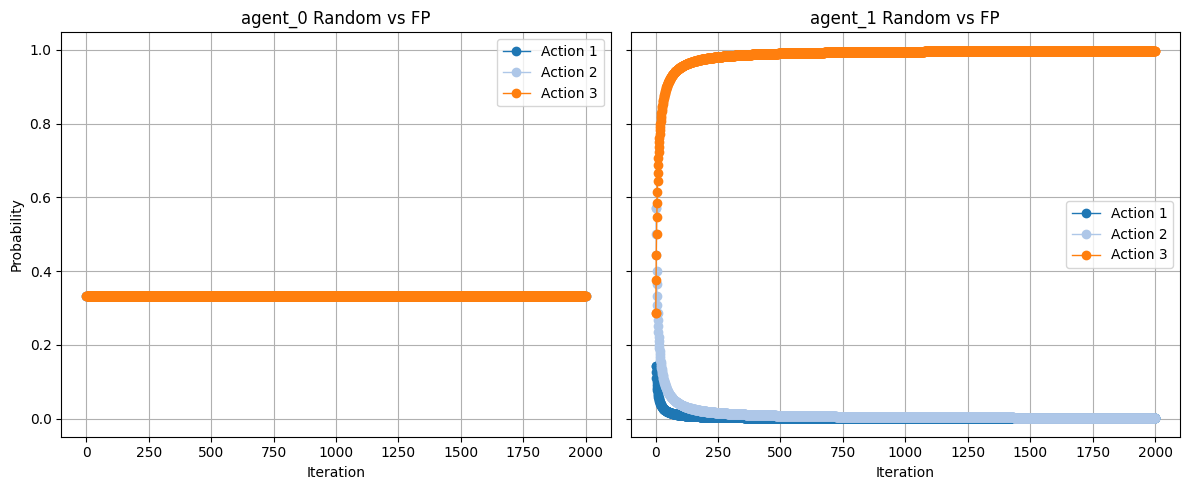

In [14]:
random_vs_fp_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                          agents[1]: FictitiousPlay(game=game, agent=agents[1], seed=1)}
policies, action_history = run_and_plot(random_vs_fp_agents, game, num_iterations=2000, title_suffix="Random vs FP")

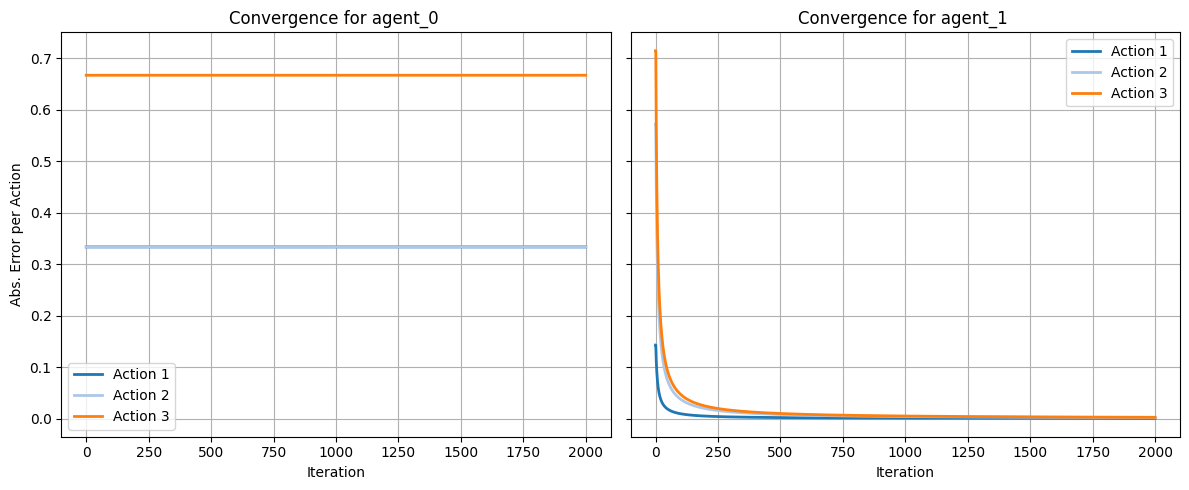

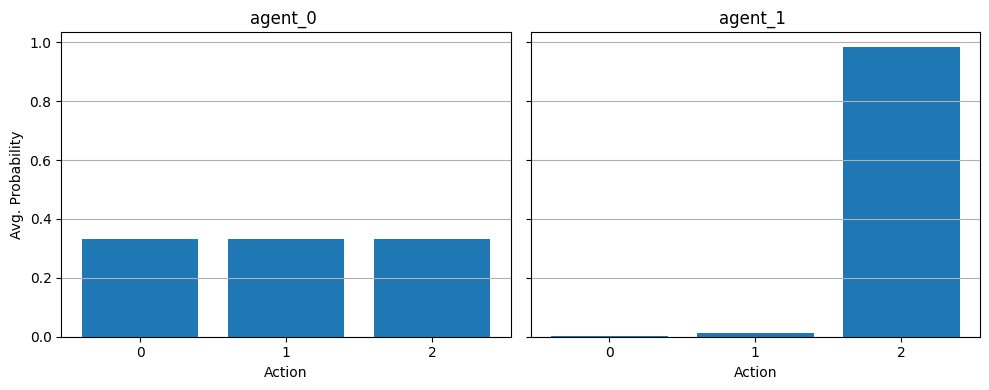

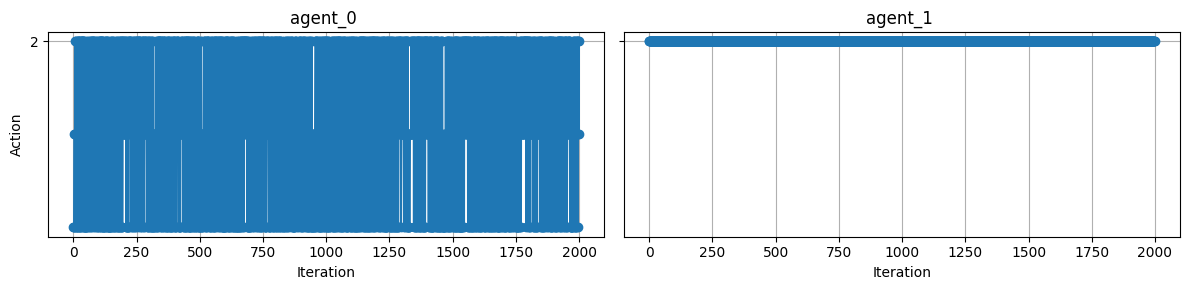

In [15]:
nash_equilibrium = {
    "agent_0": [0, 0, 1],  # (2,2,2) es el índice 2
    "agent_1": [0, 0, 1]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [16]:
for agent in random_vs_fp_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_fp_agents:
    action = get_action_from_policy(random_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.33333333 0.33333333 0.33333333]
agent_1 [4.98504487e-04 1.99401795e-03 9.97507478e-01]
Action with high probability for agent_0: [1, 1, 4]
Action with high probability for agent_1: [2, 2, 2]


# Random Agent vs Regret Matching


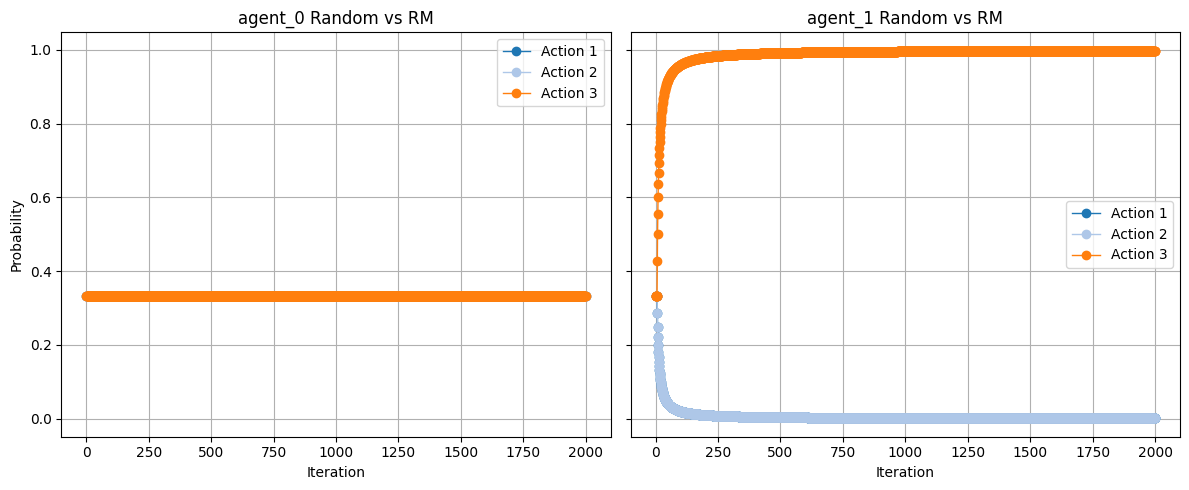

In [17]:
random_vs_rm_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                            agents[1]: RegretMatching(game=game, agent=agents[1], seed=1)}
policies, action_history = run_and_plot(random_vs_rm_agents, game, num_iterations=2000, title_suffix="Random vs RM")

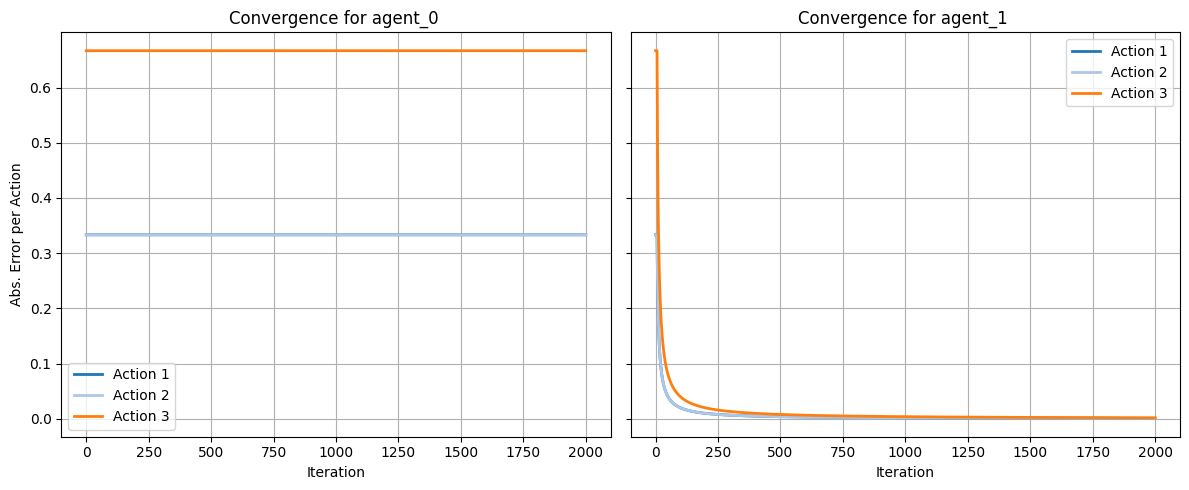

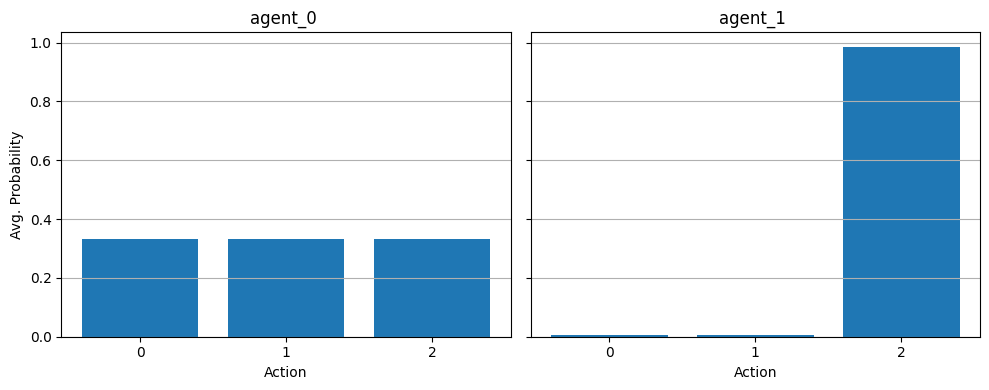

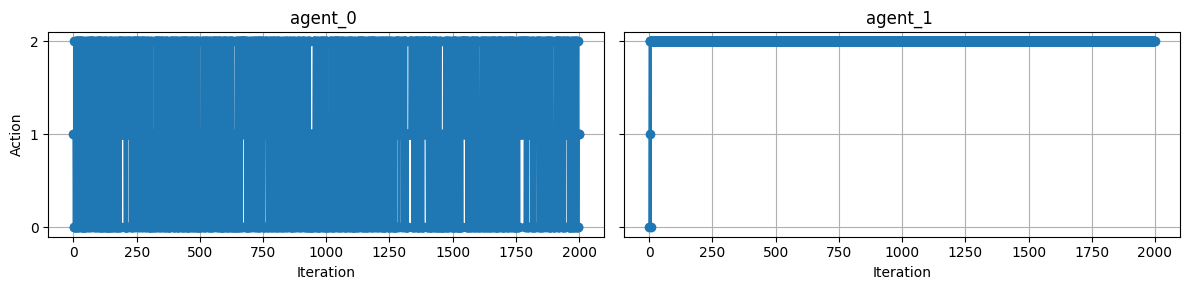

In [18]:
nash_equilibrium = {
    "agent_0": [0, 0, 1],  # (2,2,2) es el índice 2
    "agent_1": [0, 0, 1]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [19]:
for agent in random_vs_rm_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_rm_agents:
    action = get_action_from_policy(random_vs_rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.33333333 0.33333333 0.33333333]
agent_1 [4.98504487e-04 1.99401795e-03 9.97507478e-01]
Action with high probability for agent_0: [1, 1, 4]
Action with high probability for agent_1: [2, 2, 2]


In [20]:
import numpy as np
from collections import defaultdict

# Todas las acciones posibles del juego
all_actions = [list(x) for x in game._moves]

def get_action_outcome(action1, action2):
    """
    Compara dos acciones y devuelve 'win', 'lose' o 'draw' dependiendo de 
    quién gana en al menos 2 de los 3 frentes.
    """
    wins = 0
    losses = 0

    for a1, a2 in zip(action1, action2):
        if a1 > a2:
            wins += 1
        elif a1 < a2:
            losses += 1

    if wins >= 2:
        return "win"
    elif losses >= 2:
        return "lose"
    else:
        return "draw"

# Diccionario para almacenar los resultados por acción
results_by_action = {}

for i, action in enumerate(all_actions):
    outcomes = [get_action_outcome(action, opponent)
                for j, opponent in enumerate(all_actions) if j != i]

    outcomes_count = {
        "win": outcomes.count("win"),
        "lose": outcomes.count("lose"),
        "draw": outcomes.count("draw")
    }

    total = len(outcomes)
    outcomes_percentage = {
        "win": f"{(outcomes_count['win'] / total) * 100:.1f}%",
        "draw": f"{(outcomes_count['draw'] / total) * 100:.1f}%",
        "lose": f"{(outcomes_count['lose'] / total) * 100:.1f}%"
    }

    results_by_action[tuple(action)] = {
        "index": i,
        "outcomes": outcomes_count,
        "percentages": outcomes_percentage
    }

# Imprimir resumen
for action, info in results_by_action.items():
    print(f"Action {info['index']} ({action}):")
    print(f"  Resultados: {info['outcomes']}")
    print(f"  Porcentajes: {info['percentages']}")
    print("-" * 40)


Action 0 ((1, 1, 4)):
  Resultados: {'win': 0, 'lose': 1, 'draw': 1}
  Porcentajes: {'win': '0.0%', 'draw': '50.0%', 'lose': '50.0%'}
----------------------------------------
Action 1 ((1, 2, 3)):
  Resultados: {'win': 0, 'lose': 0, 'draw': 2}
  Porcentajes: {'win': '0.0%', 'draw': '100.0%', 'lose': '0.0%'}
----------------------------------------
Action 2 ((2, 2, 2)):
  Resultados: {'win': 1, 'lose': 0, 'draw': 1}
  Porcentajes: {'win': '50.0%', 'draw': '50.0%', 'lose': '0.0%'}
----------------------------------------
